# PCA Example: Creating an S&P 500 Index Fund

#### Code Authored By: Shawhin Talebi

## Import Modules

In [1]:
# import module to pull stock data from yahoo finance
import yfinance as yf

# import pandas and numpy
import pandas as pd
import numpy as np

## Import Data

#### Get Ticker Names

Code adopted from: https://medium.com/wealthy-bytes/5-lines-of-python-to-automate-getting-the-s-p-500-95a632e5e567 by Graham Guthrie

In [2]:
# define function to get list of S&P 500 names
def getSP500():
    # get table of S&P 500 stocks
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

    # get dataframe
    df_sp500 = table[0]

    # get string of ticker names
    ticker_names = str(df_sp500['Symbol'].to_list()).replace("'", "").replace("[", "").replace("]", "").replace(",", "")#.replace("BRK.B", "").replace("BF.B", "").replace("LUMN", "")

    return ticker_names

ticker_names = getSP500()
print(ticker_names)

MMM ABT ABBV ABMD ACN ATVI ADBE AMD AAP AES AFL A APD AKAM ALK ALB ARE ALXN ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS ANTM AON AOS APA AAPL AMAT APTV ADM ANET AJG AIZ T ATO ADSK ADP AZO AVB AVY BKR BLL BAC BK BAX BDX BRK.B BBY BIO BIIB BLK BA BKNG BWA BXP BSX BMY AVGO BR BF.B CHRW COG CDNS CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CERN CF SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CTXS CLX CME CMS KO CTSH CL CMCSA CMA CAG CXO COP ED STZ COO CPRT GLW CTVA COST CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DISCA DISCK DISH DG DLTR D DPZ DOV DOW DTE DUK DRE DD DXC EMN ETN EBAY ECL EIX EW EA EMR ENPH ETR EOG EFX EQIX EQR ESS EL ETSY EVRG ES RE EXC EXPE EXPD EXR XOM FFIV FB FAST FRT FDX FIS FITB FE FRC FISV FLT FLIR FLS FMC F FTNT FTV FBHS FOXA FOX BEN FCX GPS GRMN IT GD GE GIS GM GPC GILD GL GPN GS GWW HAL HBI HIG HAS HCA PEAK HSIC HSY HES HPE HLT HFC HOLX HD HON HRL HST HWM HPQ HUM HBAN HI

#### Pull S&P 500 for 2020

In [3]:
# pull historical data
data = yf.download(ticker_names, start="2020-01-01", end="2021-01-01")

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


#### Drop nans and get final ticker names 

In [4]:
# get daily close prices and drop missing columns
df_close = data['Adj Close'].dropna(axis='columns')

# define list of column names
col_names = df_close.columns.to_list()

# display pandas dataframe of close prices
df_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,85.258377,28.982893,157.909729,74.444603,83.871666,83.590858,168.809998,85.256981,206.125336,334.429993,...,100.115349,65.656494,56.393299,34.986931,78.807625,100.241150,148.020065,259.140015,50.530182,133.169510
2020-01-03,83.889473,27.548195,157.919632,73.720840,83.075554,82.539597,166.820007,84.217628,205.782028,331.809998,...,97.810677,65.128654,55.769238,34.532185,79.271484,99.927193,147.633148,256.049988,49.817135,133.189362
2020-01-06,84.137466,27.219410,155.324310,74.308266,83.731171,83.748055,179.039993,84.658859,204.438293,333.709991,...,95.771927,65.628716,56.076317,34.011127,78.758286,99.868332,146.779953,258.010010,49.210079,132.166824
2020-01-07,84.395378,27.119778,153.481827,73.958794,83.253510,83.148727,180.350006,84.188210,200.024429,333.390015,...,97.958405,65.091606,56.373489,34.058491,78.462196,100.044937,146.650970,256.470001,48.911369,132.613556
2020-01-08,85.228615,27.737495,151.718567,75.148521,83.843567,83.954369,178.690002,84.531395,200.416824,337.869995,...,97.682640,64.110008,56.967831,34.039543,78.728661,100.221542,148.406982,247.639999,49.393154,132.325638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,117.117928,15.660000,160.679993,131.970001,102.066246,96.970001,303.410004,107.915245,256.423737,499.859985,...,141.990005,41.599998,51.820000,22.333601,100.250000,107.540001,149.250000,376.890015,43.340000,160.471298
2020-12-28,117.637077,16.059999,158.800003,136.690002,102.254044,96.800003,312.910004,107.357498,258.795624,498.950012,...,141.520004,41.740002,52.310001,23.025963,100.370003,109.779999,148.889999,382.589996,43.360001,162.138718
2020-12-29,117.038063,15.860000,156.690002,134.869995,103.489594,97.120003,320.929993,107.895332,256.882202,502.109985,...,139.899994,41.270000,51.250000,22.660000,99.510002,109.449997,152.449997,378.040009,42.770000,162.867584


## PCA

In [27]:
# import PCA function from sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing

# convert dataframe to numpy array
X = df_close.to_numpy()
# substract mean from each column and divide by its standard deviation
# NOTE: this is a good thing whenever doing PCA. Transforms 0 from an absence of signal to the average of a signal
X = preprocessing.StandardScaler().fit_transform(X)

# intitialize pca with 2 components
pca = PCA(n_components=10)
# perform pca on S&P 500 close prices over the year 2020
X_pca = pca.fit_transform(X)

# print explained variance
print("Explained Variance of Each Component:")
print(pca.explained_variance_ratio_)

Explained Variance of Each Component:
[0.53754434 0.27810403 0.05623329 0.03195985 0.01913985 0.01204898
 0.00877862 0.00817426 0.0054346  0.00429227]


#### Create Index Fund of S&P500 using principle component weights

In [39]:
# get sum of weights for first 3 principle components
stock_weights_pca = pca.components_[0,:] + pca.components_[1,:] + pca.components_[2,:]
# define number of stocks to include in index fund
top_n = 61

# get boolean array of top n elements 
bool_top_stocks = abs(stock_weights_pca) > np.sort(abs(stock_weights_pca))[len(stock_weights_pca)-top_n]

# create data structures with weights and ticker names that define index fund
index_fund_weights = (stock_weights_pca[bool_top_stocks])
index_fund_tickers = df_close.columns[bool_top_stocks]

#### Bar plot visualizing index fund holdings

<function matplotlib.pyplot.show(close=None, block=None)>

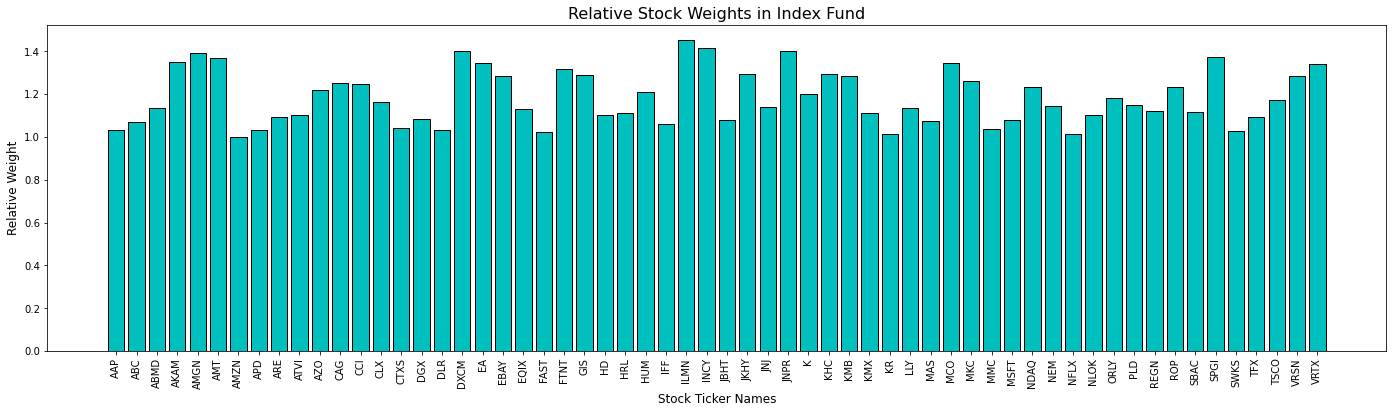

In [40]:
import matplotlib.pyplot as plt

# create figure
plt.figure(num=None, figsize=(24, 6))

plt.bar(np.arange(len(index_fund_weights)), index_fund_weights/np.max((index_fund_weights)), color = 'c', edgecolor = 'k')
plt.title("Relative Stock Weights in Index Fund", fontsize=16)
plt.xticks(np.arange(len(index_fund_weights)), index_fund_tickers, rotation=90)
plt.xlabel('Stock Ticker Names', fontsize=12)
plt.ylabel('Relative Weight', fontsize=12)
plt.show

#### Compare S&P 500 to Index Fund

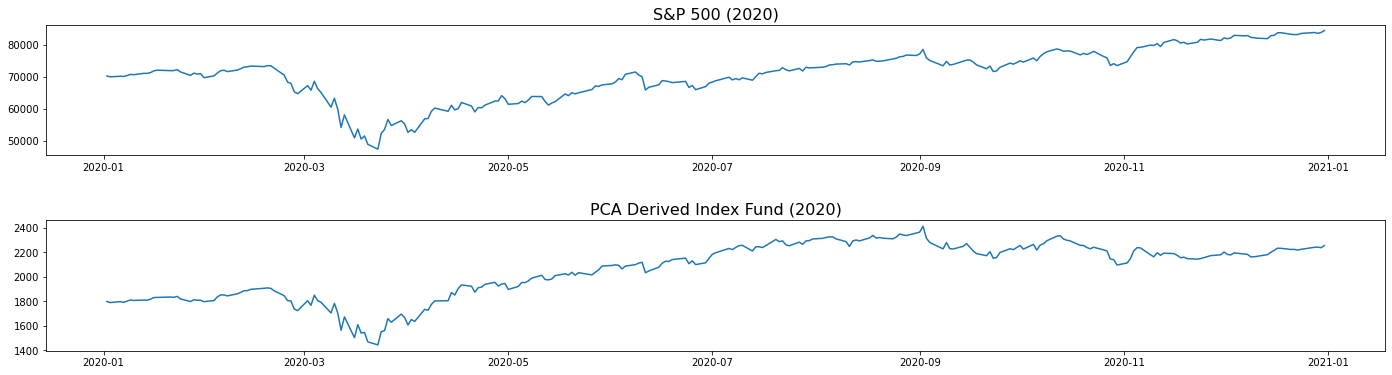

In [41]:
# create figure
plt.figure(num=None, figsize=(24, 6))

# plot S&P 500 over time
plt.subplot(2, 1, 1)
plt.plot(np.sum(df_close, axis=1))
plt.title("S&P 500 (2020)", fontsize=16)

# plot index fund over time
plt.subplot(2, 1, 2)
plt.plot(-1*np.sum(index_fund_weights * df_close.iloc[:,bool_top_stocks], axis=1))
plt.title("PCA Derived Index Fund (2020)", fontsize=16)

# add space between plots
plt.subplots_adjust(hspace = 0.5 )

### Percent Return

In [42]:
# actual percent return of S&P500 
actual_percent_return = np.sum((df_close.iloc[len(df_close)-1,:] - df_close.iloc[0,:]))/np.sum((df_close.iloc[0,:]))

print('Percent return of S&P 500:')
print(actual_percent_return)

Percent return of S&P 500:
0.2021888010540478


In [43]:
# percent return of S&P500 index fund defined by principal component 1
top_stocks_pc1_percent_return = np.sum(index_fund_weights * (df_close.iloc[len(df_close)-1,bool_top_stocks] - df_close.iloc[0,bool_top_stocks]))/np.sum(index_fund_weights * (df_close.iloc[0,bool_top_stocks]))

print('Percent return of PCA derived index fund:')
print(top_stocks_pc1_percent_return)

Percent return of PCA derived index fund:
0.25365461295976527
